# Old 2018 plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import networkx as nx 

In [2]:
df = pd.read_csv('avg_topo_bio_parsed.csv')
df.head()

,Unnamed: 0,level,group,species,species_name,nbr_rxn,nbr_nodes,nbr_edges,nbr_connected_components,nbr_nodes_lcc,...,std_clustering_coeff_lcc,ave_shortest_path_length_lcc,std_shortest_path_length_lcc,ave_betweenness_nodes_lcc,std_betweenness_nodes_lcc,ave_betweenness_edges_lcc,std_betweenness_edges_lcc,assortativity_lcc,attribute_assortativity_lcc,diameter_lcc
0,0,individual,archaea_parsed,1,Halostagnicola larsenii XH-48,1631,2019,5360,43,1919,...,0.242509,3.213344,0.820150,0.001155,0.011886,0.000607,0.001066,-0.239096,-0.012047,9
1,1,individual,archaea_parsed,2,Halosarcina pallida JCM 14848,1606,1972,5284,41,1879,...,0.234310,3.211048,0.823435,0.001179,0.012029,0.000614,0.001090,-0.233799,-0.008931,9
2,2,individual,archaea_parsed,3,Natrialba aegyptia DSM 13077,1412,1749,4461,32,1678,...,0.244012,3.331950,0.852827,0.001393,0.013168,0.000754,0.001341,-0.201598,0.004561,8
3,3,individual,archaea_parsed,4,Natronococcus amylolyticus DSM 10524,1391,1709,4370,31,1641,...,0.242987,3.303821,0.835987,0.001407,0.012982,0.000763,0.001345,-0.206659,0.004946,9
4,4,individual,archaea_parsed,5,Halogranum salarium B-1,1537,1883,5058,38,1798,...,0.236181,3.144650,0.796026,0.001195,0.012742,0.000628,0.001135,-0.244833,-0.010721,9


In [51]:
bacteria = df[df['group'].str.contains('bacteria_parsed')]
archaea = df[df['group'].str.contains('archaea_parsed')]
eukarya = df[df['group'].str.contains('eukarya')]

#df[df['model'].str.contains('ac')]


In [52]:
paths = ['/home/dylwhat/School/SecondaryProject/effective_ec_lists/ecosystem_JGI/',
'/home/dylwhat/School/SecondaryProject/effective_ec_lists/ecosystem_YNP', 
'/home/dylwhat/School/SecondaryProject/effective_ec_lists/individual_archaea_parsed',
'/home/dylwhat/School/SecondaryProject/effective_ec_lists/individual_bacteria_parsed',
'/home/dylwhat/School/SecondaryProject/effective_ec_lists/individual_eukarya']

data = [] ### list containing .dat filenames
files = {} ### dict for making paths unique

for path in paths: ### joining data
    files[path] = glob.glob(os.path.join(path, '*.dat'))

bacteria_parsed = files[paths[3]]
archaea_parsed = files[paths[2]]
eukarya_notparsed = files[paths[4]]
bacteria_ec = []
archaea_ec = []
eukarya_ec = []

### PULL EC DATA FROM DIFFERENT PATHS 
### appends data into *_parsed lists
for i in bacteria_parsed:
    dt = np.genfromtxt(i, dtype='str')
    bacteria_ec.append(dt)
    
for i in archaea_parsed:
    dt = np.genfromtxt(i, dtype='str')
    archaea_ec.append(dt)
    
for i in eukarya_notparsed:
    dt = np.genfromtxt(i, dtype='str')
    eukarya_ec.append(dt)

In [53]:
### getting enzyme counts and redox enzyme counts for bacteria, archaea, eukarya

enzymes_bacteria = [] ### list containing total number of enzymes per .dat file
oxidos_bacteria = [] ### list containing total number of oxidoreductase enzymes per .dat file
enzymes_archaea = []
oxidos_archaea = []
enzymes_eukarya = []
oxidos_eukarya = []

for i in bacteria_ec:
    total = len(i)
    enzymes_bacteria.append(total)
    oxido_count_bacteria = 0
    for j in i:
        if j[0] == '1':
            oxido_count_bacteria += 1
    oxidos_bacteria.append(oxido_count_bacteria)
    
for i in archaea_ec:
    total = len(i)
    enzymes_archaea.append(total)
    oxido_count_archaea = 0
    for j in i:
        if j[0] == '1':
            oxido_count_archaea += 1
    oxidos_archaea.append(oxido_count_archaea)
    
for i in eukarya_ec:
    total = len(i)
    enzymes_eukarya.append(total)
    oxido_count_eukarya = 0
    for j in i:
        if j[0] == '1':
            oxido_count_eukarya += 1
    oxidos_eukarya.append(oxido_count_eukarya)

oxidos_bacteria = np.array(oxidos_bacteria)
enzymes_bacteria = np.array(enzymes_bacteria)
oxido_frac_bacteria = oxidos_bacteria/enzymes_bacteria

oxidos_archaea = np.array(oxidos_archaea)
enzymes_archaea = np.array(enzymes_archaea)
oxido_frac_archaea = oxidos_archaea/enzymes_archaea

oxidos_eukarya = np.array(oxidos_eukarya)
enzymes_eukarya = np.array(enzymes_eukarya)
oxido_frac_eukarya = oxidos_eukarya/enzymes_eukarya

In [54]:
### TRANSFER ENZYME COUNTS for bacteria, archaea, eukarya

transfers_bacteria = [] ### list containing total number of oxidoreductase enzymes per .dat file
transfers_archaea = []
transfers_eukarya = []

for i in bacteria_ec:
    total = len(i)
   # enzymes_bacteria.append(total)
    transfer_count_bacteria = 0
    for j in i:
        if j[0] == '2':
            transfer_count_bacteria += 1
    transfers_bacteria.append(transfer_count_bacteria)
    
for i in archaea_ec:
    total = len(i)
   # enzymes_archaea.append(total)
    transfer_count_archaea = 0
    for j in i:
        if j[0] == '2':
            transfer_count_archaea += 1
    transfers_archaea.append(transfer_count_archaea)
    
for i in eukarya_ec:
    total = len(i)
   # enzymes_eukarya.append(total)
    transfer_count_eukarya = 0
    for j in i:
        if j[0] == '2':
            transfer_count_eukarya += 1
    transfers_eukarya.append(transfer_count_eukarya)

transfers_bacteria = np.array(transfers_bacteria)
transfer_frac_bacteria = transfers_bacteria/enzymes_bacteria

transfers_archaea = np.array(transfers_archaea)
transfer_frac_archaea = transfers_archaea/enzymes_archaea

transfers_eukarya = np.array(transfers_eukarya)
transfer_frac_eukarya = transfers_eukarya/enzymes_eukarya

In [55]:
### HYDROLYSIS ENZYME COUNTS for bacteria, archaea, eukarya

hydros_bacteria = [] ### list containing total number of oxidoreductase enzymes per .dat file
hydros_archaea = []
hydros_eukarya = []

for i in bacteria_ec:
    total = len(i)
   # enzymes_bacteria.append(total)
    hydro_count_bacteria = 0
    for j in i:
        if j[0] == '3':
            hydro_count_bacteria += 1
    hydros_bacteria.append(hydro_count_bacteria)
    
for i in archaea_ec:
    total = len(i)
   # enzymes_archaea.append(total)
    hydro_count_archaea = 0
    for j in i:
        if j[0] == '3':
            hydro_count_archaea += 1
    hydros_archaea.append(hydro_count_archaea)
    
for i in eukarya_ec:
    total = len(i)
   # enzymes_eukarya.append(total)
    hydro_count_eukarya = 0
    for j in i:
        if j[0] == '3':
            hydro_count_eukarya += 1
    hydros_eukarya.append(hydro_count_eukarya)

hydros_bacteria = np.array(hydros_bacteria)
hydro_frac_bacteria = hydros_bacteria/enzymes_bacteria

hydros_archaea = np.array(hydros_archaea)
hydro_frac_archaea = hydros_archaea/enzymes_archaea

hydros_eukarya = np.array(hydros_eukarya)
hydro_frac_eukarya = hydros_eukarya/enzymes_eukarya

In [56]:
### LYASE ENZYME COUNTS for bacteria, archaea, eukarya

lyases_bacteria = [] ### list containing total number of oxidoreductase enzymes per .dat file
lyases_archaea = []
lyases_eukarya = []

for i in bacteria_ec:
    total = len(i)
    lyase_count_bacteria = 0
    for j in i:
        if j[0] == '4':
            lyase_count_bacteria += 1
    lyases_bacteria.append(lyase_count_bacteria)
    
for i in archaea_ec:
    total = len(i)
    lyase_count_archaea = 0
    for j in i:
        if j[0] == '4':
            lyase_count_archaea += 1
    lyases_archaea.append(lyase_count_archaea)
    
for i in eukarya_ec:
    total = len(i)
    lyase_count_eukarya = 0
    for j in i:
        if j[0] == '4':
            lyase_count_eukarya += 1
    lyases_eukarya.append(lyase_count_eukarya)

lyases_bacteria = np.array(lyases_bacteria)
lyase_frac_bacteria = lyases_bacteria/enzymes_bacteria

lyases_archaea = np.array(lyases_archaea)
lyase_frac_archaea = lyases_archaea/enzymes_archaea

lyases_eukarya = np.array(lyases_eukarya)
lyase_frac_eukarya = lyases_eukarya/enzymes_eukarya

In [57]:
### ISOMERASE ENZYME COUNTS for bacteria, archaea, eukarya

isomers_bacteria = [] ### list containing total number of oxidoreductase enzymes per .dat file
isomers_archaea = []
isomers_eukarya = []

for i in bacteria_ec:
    total = len(i)
    isomer_count_bacteria = 0
    for j in i:
        if j[0] == '5':
            isomer_count_bacteria += 1
    isomers_bacteria.append(isomer_count_bacteria)
    
for i in archaea_ec:
    total = len(i)
    isomer_count_archaea = 0
    for j in i:
        if j[0] == '5':
            isomer_count_archaea += 1
    isomers_archaea.append(isomer_count_archaea)
    
for i in eukarya_ec:
    total = len(i)
    isomer_count_eukarya = 0
    for j in i:
        if j[0] == '5':
            isomer_count_eukarya += 1
    isomers_eukarya.append(isomer_count_eukarya)

isomers_bacteria = np.array(isomers_bacteria)
isomer_frac_bacteria = isomers_bacteria/enzymes_bacteria

isomers_archaea = np.array(isomers_archaea)
isomer_frac_archaea = isomers_archaea/enzymes_archaea

isomers_eukarya = np.array(isomers_eukarya)
isomer_frac_eukarya = isomers_eukarya/enzymes_eukarya

In [58]:
### LIGASE ENZYME COUNTS for bacteria, archaea, eukarya

ligs_bacteria = [] ### list containing total number of oxidoreductase enzymes per .dat file
ligs_archaea = []
ligs_eukarya = []

for i in bacteria_ec:
    total = len(i)
    lig_count_bacteria = 0
    for j in i:
        if j[0] == '6':
            lig_count_bacteria += 1
    ligs_bacteria.append(lig_count_bacteria)
    
for i in archaea_ec:
    total = len(i)
    lig_count_archaea = 0
    for j in i:
        if j[0] == '6':
            lig_count_archaea += 1
    ligs_archaea.append(lig_count_archaea)
    
for i in eukarya_ec:
    total = len(i)
    lig_count_eukarya = 0
    for j in i:
        if j[0] == '6':
            lig_count_eukarya += 1
    ligs_eukarya.append(lig_count_eukarya)

ligs_bacteria = np.array(ligs_bacteria)
lig_frac_bacteria = ligs_bacteria/enzymes_bacteria

ligs_archaea = np.array(ligs_archaea)
lig_frac_archaea = ligs_archaea/enzymes_archaea

ligs_eukarya = np.array(ligs_eukarya)
lig_frac_eukarya = ligs_eukarya/enzymes_eukarya

In [59]:
print(len(oxidos_bacteria))
print(len(enzymes_bacteria))
print(len(oxidos_archaea))
print(len(enzymes_archaea))
print(len(oxidos_eukarya))
print(len(enzymes_eukarya))

print(len(transfers_bacteria))

1153
1153
199
199
77
77
1153


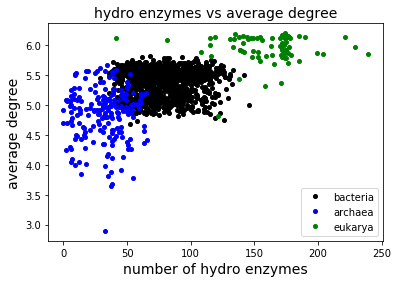

In [60]:
### hydro enzymes vs degree
plt.plot(hydros_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(hydros_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(hydros_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('hydro enzymes vs average degree', fontsize=14)
plt.xlabel('number of hydro enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('hydros_vs_avg_deg')

In [61]:
bacteria['ave_degree_lcc']

199     5.812000
200     5.720017
201     5.691158
202     5.747748
203     5.693095
204     5.663952
205     5.640101
206     5.681946
207     5.781850
208     5.619599
209     5.693878
210     5.693056
211     5.592225
212     5.626703
213     5.643678
214     5.611404
215     5.699867
216     5.717914
217     5.808879
218     5.692032
219     5.631746
220     5.693733
221     5.617306
222     5.577689
223     5.749338
224     5.717820
225     5.696564
226     5.667700
227     5.591667
228     5.647113
          ...   
1322    4.863819
1323    4.987741
1324    5.104793
1325    4.674191
1326    5.054206
1327    4.921457
1328    5.051875
1329    5.283221
1330    5.168912
1331    4.875878
1332    4.958929
1333    4.959707
1334    5.247851
1335    5.048507
1336    4.932218
1337    4.881423
1338    5.116098
1339    4.872517
1340    4.862144
1341    4.935636
1342    4.941569
1343    4.970840
1344    4.994709
1345    4.936416
1346    5.070320
1347    4.828265
1348    4.847610
1349    4.9099

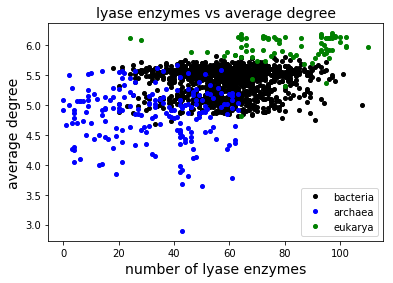

In [62]:
### lyase enzymes vs degree
plt.plot(lyases_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(lyases_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(lyases_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('lyase enzymes vs average degree', fontsize=14)
plt.xlabel('number of lyase enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lyases_vs_avg_deg')

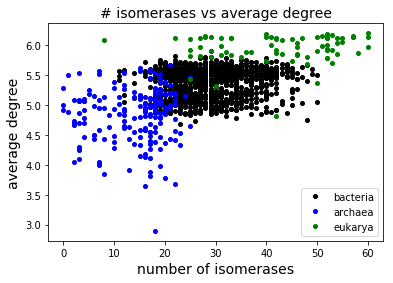

In [63]:
### isomer enzymes vs degree
plt.plot(isomers_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(isomers_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(isomers_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('# isomerases vs average degree', fontsize=14)
plt.xlabel('number of isomerases', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('isomers_vs_avg_deg')

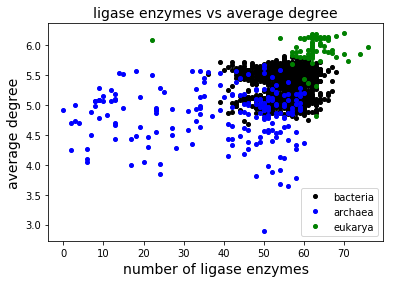

In [64]:
### ligase enzymes vs degree
plt.plot(ligs_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(ligs_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(ligs_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('ligase enzymes vs average degree', fontsize=14)
plt.xlabel('number of ligase enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('ligases_vs_avg_deg')

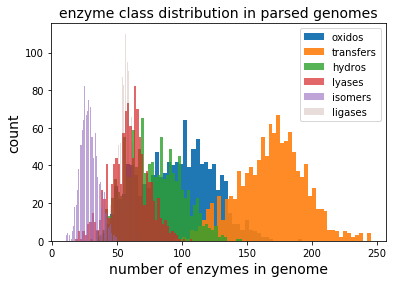

In [144]:
### enzyme class histogram
plt.hist(oxidos_bacteria, alpha=1.0, bins=50, label='oxidos')
plt.hist(transfers_bacteria, alpha=0.9, bins=50, label='transfers')
plt.hist(hydros_bacteria, alpha=0.8, bins=50, label='hydros')
plt.hist(lyases_bacteria, alpha=0.7, bins=50, label='lyases')
plt.hist(isomers_bacteria, alpha=0.6, bins=50, label='isomers')
plt.hist(ligs_bacteria, alpha=0.2, bins=50, label='ligases')
plt.legend(loc='upper right')
plt.xlabel('number of enzymes in genome', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('enzyme class distribution in parsed genomes', fontsize=14)
plt.savefig('enzyme_class_distribution')

In [66]:
### dataframe subsets
archaea = df[df['group'].str.contains("archaea")]
bacteria = df[df['group'].str.contains("bacteria")]
eukarya = df[df['group'].str.contains("eukarya")]

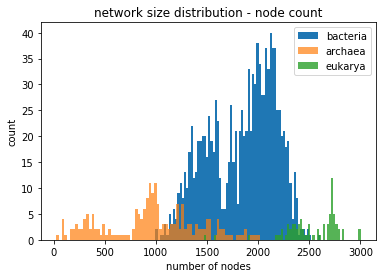

In [139]:
### HISTOGRAM OF NETWORK SIZE VIA NODE COUNT
plt.hist(bacteria['nbr_nodes'], alpha=1.0, bins=75, label='bacteria')
plt.hist(archaea['nbr_nodes'], alpha=0.7, bins=75, label='archaea')
plt.hist(eukarya['nbr_nodes'], alpha=0.8, bins=75, label='eukarya')
plt.title('network size distribution - node count')
plt.legend(loc='best')
plt.xlabel('number of nodes')
plt.ylabel('count')
plt.savefig('node_distribution_hist')

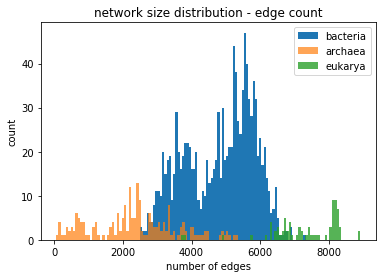

In [140]:
### HISTOGRAM OF NETWORK SIZE VIA EDGE COUNT
plt.hist(bacteria['nbr_edges'], alpha=1.0, bins=75, label='bacteria')
plt.hist(archaea['nbr_edges'], alpha=0.7, bins=75, label='archaea')
plt.hist(eukarya['nbr_edges'], alpha=0.8, bins=75, label='eukarya')
plt.title('network size distribution - edge count')
plt.legend(loc='best')
plt.xlabel('number of edges')
plt.ylabel('count')
plt.savefig('edge_distribution_hist')

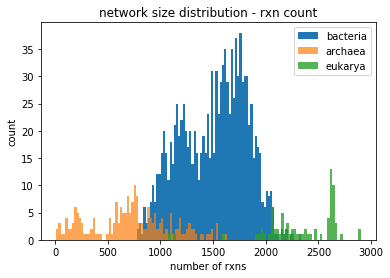

In [143]:
### HISTOGRAM OF NETWORK SIZE VIA REACTION COUNT
plt.hist(bacteria['nbr_rxn'], alpha=1.0, bins=75, label='bacteria')
plt.hist(archaea['nbr_rxn'], alpha=0.7, bins=75, label='archaea')
plt.hist(eukarya['nbr_rxn'], alpha=0.8, bins=75, label='eukarya')
plt.title('network size distribution - rxn count')
plt.legend(loc='best')
plt.xlabel('number of rxns')
plt.ylabel('count')
plt.savefig('rxn_distribution_hist')

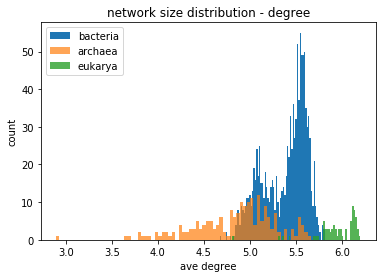

In [142]:
### HISTOGRAM OF NETWORK SIZE VIA REACTION COUNT
plt.hist(bacteria['ave_degree_lcc'], alpha=1.0, bins=75, label='bacteria')
plt.hist(archaea['ave_degree_lcc'], alpha=0.7, bins=75, label='archaea')
plt.hist(eukarya['ave_degree_lcc'], alpha=0.8, bins=75, label='eukarya')
plt.title('network size distribution - degree')
plt.legend(loc='best')
plt.xlabel('ave degree')
plt.ylabel('count')
plt.savefig('degree_distribution_hist')

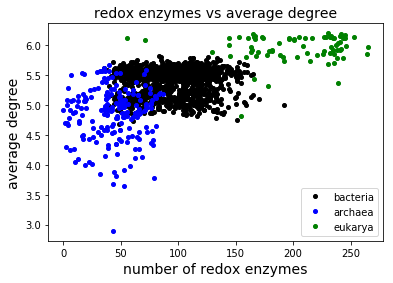

In [71]:
### redox enzymes vs degree
plt.plot(oxidos_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxidos_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxidos_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('redox enzymes vs average degree', fontsize=14)
plt.xlabel('number of redox enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('oxidos_vs_avg_deg')

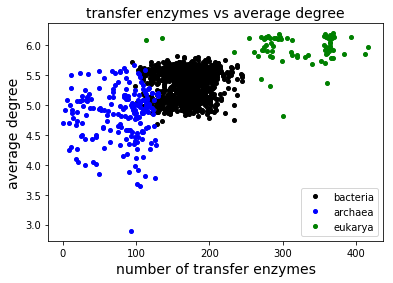

In [72]:
### transfer enzymes vs degree
plt.plot(transfers_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(transfers_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(transfers_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('transfer enzymes vs average degree', fontsize=14)
plt.xlabel('number of transfer enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('transfers_vs_avg_deg')

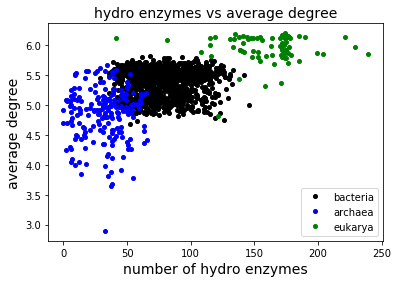

In [73]:
### hydro enzymes vs degree
plt.plot(hydros_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(hydros_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(hydros_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('hydro enzymes vs average degree', fontsize=14)
plt.xlabel('number of hydro enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('hydros_vs_avg_deg')

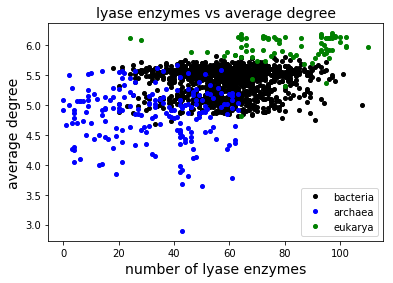

In [74]:
### lyase enzymes vs degree
plt.plot(lyases_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(lyases_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(lyases_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('lyase enzymes vs average degree', fontsize=14)
plt.xlabel('number of lyase enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lyases_vs_avg_deg')

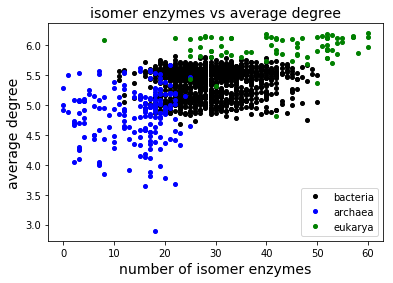

In [75]:
### isomer enzymes vs degree
plt.plot(isomers_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(isomers_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(isomers_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('isomer enzymes vs average degree', fontsize=14)
plt.xlabel('number of isomer enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('isomers_vs_avg_deg')

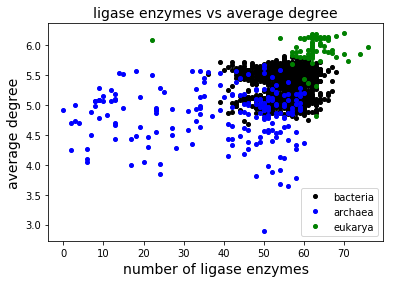

In [76]:
### transfer enzymes vs degree
plt.plot(ligs_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(ligs_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(ligs_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('ligase enzymes vs average degree', fontsize=14)
plt.xlabel('number of ligase enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('ligases_vs_avg_deg')

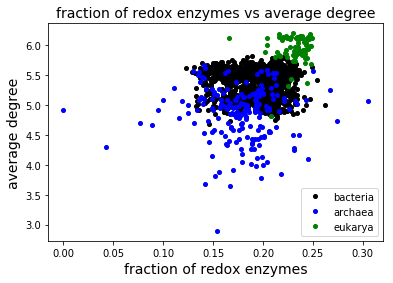

In [77]:
### redox enzyme frac vs degree
plt.plot(oxido_frac_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxido_frac_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxido_frac_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of redox enzymes vs average degree', fontsize=14)
plt.xlabel('fraction of redox enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('oxido_frac_vs_avg_deg')

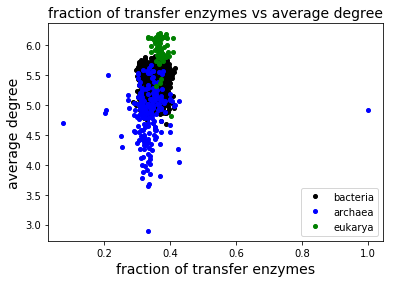

In [78]:
### transfer enzyme frac vs degree
plt.plot(transfer_frac_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(transfer_frac_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(transfer_frac_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of transfer enzymes vs average degree', fontsize=14)
plt.xlabel('fraction of transfer enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('transfer_frac_vs_avg_deg')

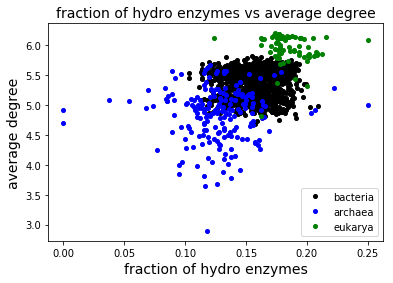

In [79]:
### hydro enzyme frac vs degree
plt.plot(hydro_frac_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(hydro_frac_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(hydro_frac_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of hydro enzymes vs average degree', fontsize=14)
plt.xlabel('fraction of hydro enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('hydro_frac_vs_avg_deg')

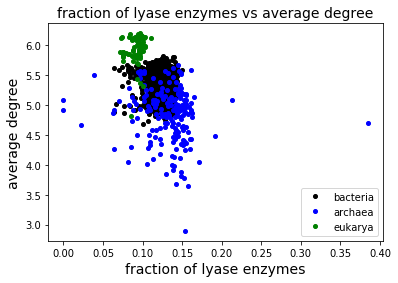

In [80]:
### redox enzyme frac vs degree
plt.plot(lyase_frac_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(lyase_frac_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(lyase_frac_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of lyase enzymes vs average degree', fontsize=14)
plt.xlabel('fraction of lyase enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lyase_frac_vs_avg_deg')

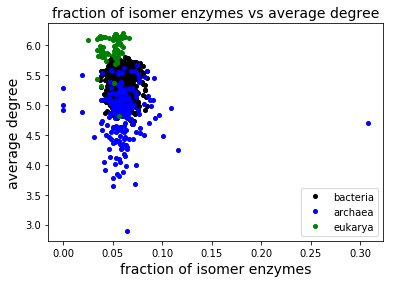

In [81]:
### isomer enzyme frac vs degree
plt.plot(isomer_frac_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(isomer_frac_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(isomer_frac_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of isomer enzymes vs average degree', fontsize=14)
plt.xlabel('fraction of isomer enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('isomer_frac_vs_avg_deg')

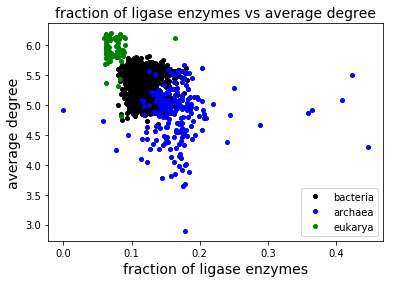

In [82]:
### ligase enzyme frac vs degree
plt.plot(lig_frac_bacteria, bacteria['ave_degree_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(lig_frac_archaea, archaea['ave_degree_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(lig_frac_eukarya, eukarya['ave_degree_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of ligase enzymes vs average degree', fontsize=14)
plt.xlabel('fraction of ligase enzymes', fontsize=14)
plt.ylabel('average degree', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lig_frac_vs_avg_deg')

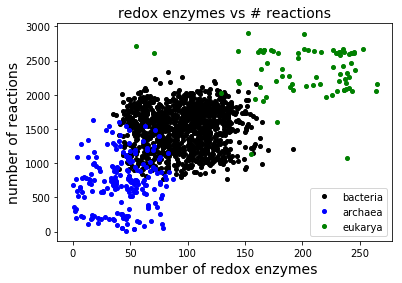

In [83]:
### redox enzymes vs # reactions
plt.plot(oxidos_bacteria, bacteria['nbr_rxn'], 'ko', markersize=4, label='bacteria')
plt.plot(oxidos_archaea, archaea['nbr_rxn'], 'bo', markersize=4, label='archaea')
plt.plot(oxidos_eukarya, eukarya['nbr_rxn'], 'go', markersize=4, label='eukarya')
plt.title('redox enzymes vs # reactions', fontsize=14)
plt.xlabel('number of redox enzymes', fontsize=14)
plt.ylabel('number of reactions', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('oxidos_vs_rxns')

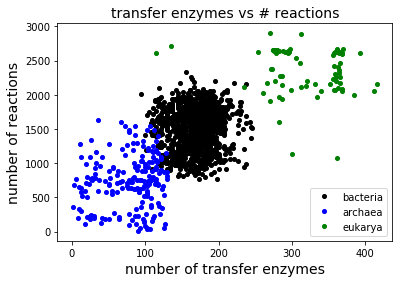

In [84]:
### redox enzymes vs # reactions
plt.plot(transfers_bacteria, bacteria['nbr_rxn'], 'ko', markersize=4, label='bacteria')
plt.plot(transfers_archaea, archaea['nbr_rxn'], 'bo', markersize=4, label='archaea')
plt.plot(transfers_eukarya, eukarya['nbr_rxn'], 'go', markersize=4, label='eukarya')
plt.title('transfer enzymes vs # reactions', fontsize=14)
plt.xlabel('number of transfer enzymes', fontsize=14)
plt.ylabel('number of reactions', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('transfers_vs_rxns')

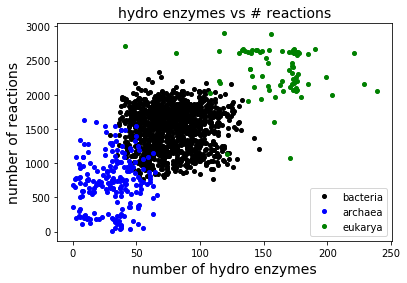

In [85]:
### hydro enzymes vs # reactions
plt.plot(hydros_bacteria, bacteria['nbr_rxn'], 'ko', markersize=4, label='bacteria')
plt.plot(hydros_archaea, archaea['nbr_rxn'], 'bo', markersize=4, label='archaea')
plt.plot(hydros_eukarya, eukarya['nbr_rxn'], 'go', markersize=4, label='eukarya')
plt.title('hydro enzymes vs # reactions', fontsize=14)
plt.xlabel('number of hydro enzymes', fontsize=14)
plt.ylabel('number of reactions', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('hydros_vs_rxns')

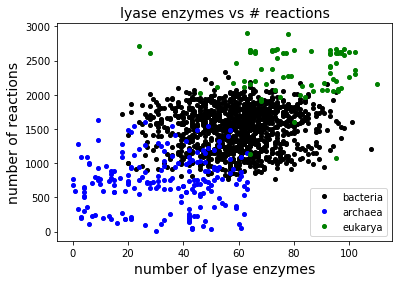

In [86]:
### lyase enzymes vs # reactions
plt.plot(lyases_bacteria, bacteria['nbr_rxn'], 'ko', markersize=4, label='bacteria')
plt.plot(lyases_archaea, archaea['nbr_rxn'], 'bo', markersize=4, label='archaea')
plt.plot(lyases_eukarya, eukarya['nbr_rxn'], 'go', markersize=4, label='eukarya')
plt.title('lyase enzymes vs # reactions', fontsize=14)
plt.xlabel('number of lyase enzymes', fontsize=14)
plt.ylabel('number of reactions', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lysaes_vs_rxns')

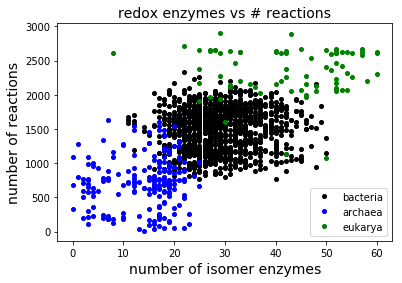

In [87]:
### isomer enzymes vs # reactions
plt.plot(isomers_bacteria, bacteria['nbr_rxn'], 'ko', markersize=4, label='bacteria')
plt.plot(isomers_archaea, archaea['nbr_rxn'], 'bo', markersize=4, label='archaea')
plt.plot(isomers_eukarya, eukarya['nbr_rxn'], 'go', markersize=4, label='eukarya')
plt.title('redox enzymes vs # reactions', fontsize=14)
plt.xlabel('number of isomer enzymes', fontsize=14)
plt.ylabel('number of reactions', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('isomers_vs_rxns')

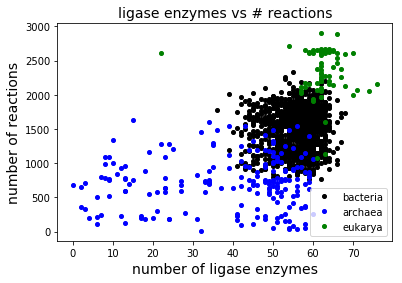

In [88]:
### ligase enzymes vs # reactions
plt.plot(ligs_bacteria, bacteria['nbr_rxn'], 'ko', markersize=4, label='bacteria')
plt.plot(ligs_archaea, archaea['nbr_rxn'], 'bo', markersize=4, label='archaea')
plt.plot(ligs_eukarya, eukarya['nbr_rxn'], 'go', markersize=4, label='eukarya')
plt.title('ligase enzymes vs # reactions', fontsize=14)
plt.xlabel('number of ligase enzymes', fontsize=14)
plt.ylabel('number of reactions', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('ligases_vs_rxns')

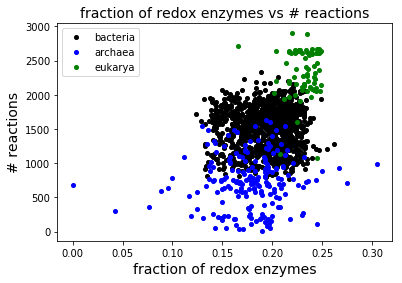

In [89]:
### redox enzyme frac vs degree
plt.plot(oxido_frac_bacteria, bacteria['nbr_rxn'], 'ko', markersize=4, label='bacteria')
plt.plot(oxido_frac_archaea, archaea['nbr_rxn'], 'bo', markersize=4, label='archaea')
plt.plot(oxido_frac_eukarya, eukarya['nbr_rxn'], 'go', markersize=4, label='eukarya')
plt.title('fraction of redox enzymes vs # reactions', fontsize=14)
plt.xlabel('fraction of redox enzymes', fontsize=14)
plt.ylabel('# reactions', fontsize=14)
plt.legend(loc='upper left')
plt.savefig('oxido_frac_vs_rxns')

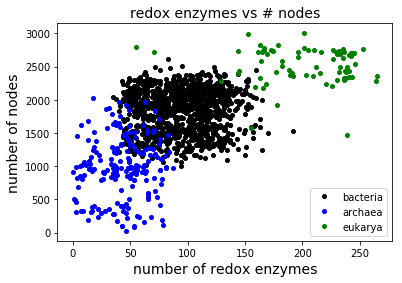

In [90]:
### redox enzymes vs # nodes
plt.plot(oxidos_bacteria, bacteria['nbr_nodes'], 'ko', markersize=4, label='bacteria')
plt.plot(oxidos_archaea, archaea['nbr_nodes'], 'bo', markersize=4, label='archaea')
plt.plot(oxidos_eukarya, eukarya['nbr_nodes'], 'go', markersize=4, label='eukarya')
plt.title('redox enzymes vs # nodes', fontsize=14)
plt.xlabel('number of redox enzymes', fontsize=14)
plt.ylabel('number of nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('oxidos_vs_nodes')

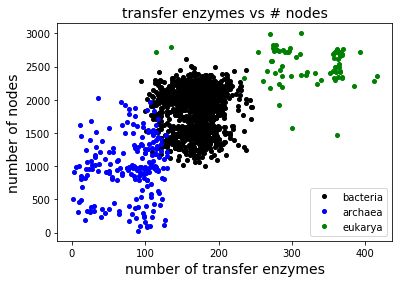

In [91]:
### redox enzymes vs # nodes
plt.plot(transfers_bacteria, bacteria['nbr_nodes'], 'ko', markersize=4, label='bacteria')
plt.plot(transfers_archaea, archaea['nbr_nodes'], 'bo', markersize=4, label='archaea')
plt.plot(transfers_eukarya, eukarya['nbr_nodes'], 'go', markersize=4, label='eukarya')
plt.title('transfer enzymes vs # nodes', fontsize=14)
plt.xlabel('number of transfer enzymes', fontsize=14)
plt.ylabel('number of nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('transfers_vs_nodes')

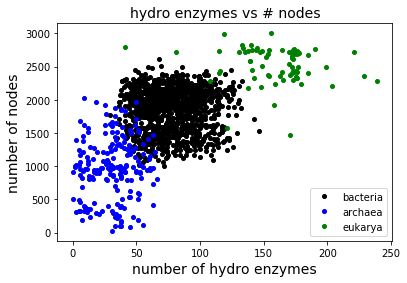

In [92]:
### hydro enzymes vs # nodes
plt.plot(hydros_bacteria, bacteria['nbr_nodes'], 'ko', markersize=4, label='bacteria')
plt.plot(hydros_archaea, archaea['nbr_nodes'], 'bo', markersize=4, label='archaea')
plt.plot(hydros_eukarya, eukarya['nbr_nodes'], 'go', markersize=4, label='eukarya')
plt.title('hydro enzymes vs # nodes', fontsize=14)
plt.xlabel('number of hydro enzymes', fontsize=14)
plt.ylabel('number of nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('hydros_vs_nodes')

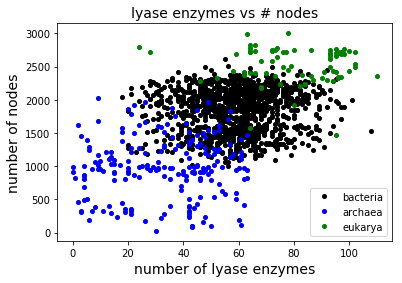

In [93]:
### lyase enzymes vs # nodes
plt.plot(lyases_bacteria, bacteria['nbr_nodes'], 'ko', markersize=4, label='bacteria')
plt.plot(lyases_archaea, archaea['nbr_nodes'], 'bo', markersize=4, label='archaea')
plt.plot(lyases_eukarya, eukarya['nbr_nodes'], 'go', markersize=4, label='eukarya')
plt.title('lyase enzymes vs # nodes', fontsize=14)
plt.xlabel('number of lyase enzymes', fontsize=14)
plt.ylabel('number of nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lyases_vs_nodes')

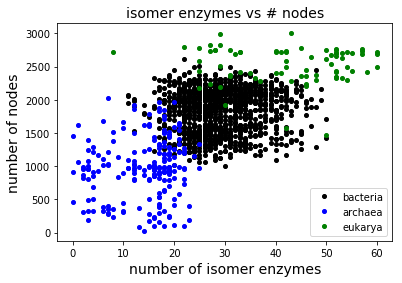

In [94]:
### isomer enzymes vs # nodes
plt.plot(isomers_bacteria, bacteria['nbr_nodes'], 'ko', markersize=4, label='bacteria')
plt.plot(isomers_archaea, archaea['nbr_nodes'], 'bo', markersize=4, label='archaea')
plt.plot(isomers_eukarya, eukarya['nbr_nodes'], 'go', markersize=4, label='eukarya')
plt.title('isomer enzymes vs # nodes', fontsize=14)
plt.xlabel('number of isomer enzymes', fontsize=14)
plt.ylabel('number of nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('isomers_vs_nodes')

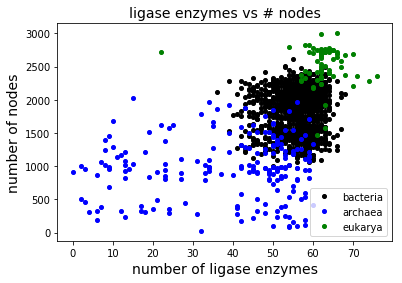

In [95]:
### redox enzymes vs # nodes
plt.plot(ligs_bacteria, bacteria['nbr_nodes'], 'ko', markersize=4, label='bacteria')
plt.plot(ligs_archaea, archaea['nbr_nodes'], 'bo', markersize=4, label='archaea')
plt.plot(ligs_eukarya, eukarya['nbr_nodes'], 'go', markersize=4, label='eukarya')
plt.title('ligase enzymes vs # nodes', fontsize=14)
plt.xlabel('number of ligase enzymes', fontsize=14)
plt.ylabel('number of nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('ligs_vs_nodes')

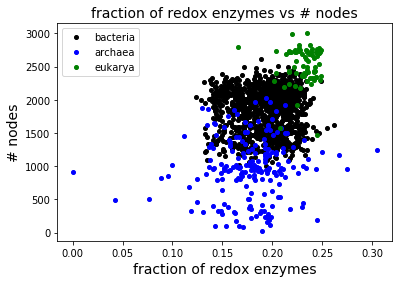

In [96]:
### redox enzyme frac vs nodes
plt.plot(oxido_frac_bacteria, bacteria['nbr_nodes'], 'ko', markersize=4, label='bacteria')
plt.plot(oxido_frac_archaea, archaea['nbr_nodes'], 'bo', markersize=4, label='archaea')
plt.plot(oxido_frac_eukarya, eukarya['nbr_nodes'], 'go', markersize=4, label='eukarya')
plt.title('fraction of redox enzymes vs # nodes', fontsize=14)
plt.xlabel('fraction of redox enzymes', fontsize=14)
plt.ylabel('# nodes', fontsize=14)
plt.legend(loc='upper left')
plt.savefig('oxido_frac_vs_nodes')

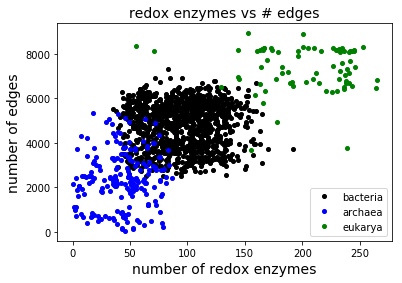

In [97]:
### redox enzymes vs # edges
plt.plot(oxidos_bacteria, bacteria['nbr_edges'], 'ko', markersize=4, label='bacteria')
plt.plot(oxidos_archaea, archaea['nbr_edges'], 'bo', markersize=4, label='archaea')
plt.plot(oxidos_eukarya, eukarya['nbr_edges'], 'go', markersize=4, label='eukarya')
plt.title('redox enzymes vs # edges', fontsize=14)
plt.xlabel('number of redox enzymes', fontsize=14)
plt.ylabel('number of edges', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('oxidos_vs_edges')

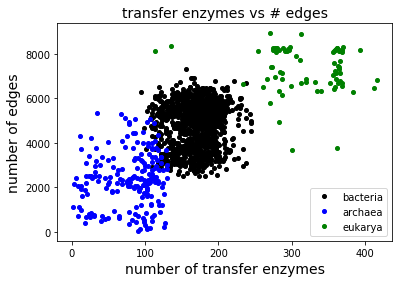

In [98]:
### transfer enzymes vs # edges
plt.plot(transfers_bacteria, bacteria['nbr_edges'], 'ko', markersize=4, label='bacteria')
plt.plot(transfers_archaea, archaea['nbr_edges'], 'bo', markersize=4, label='archaea')
plt.plot(transfers_eukarya, eukarya['nbr_edges'], 'go', markersize=4, label='eukarya')
plt.title('transfer enzymes vs # edges', fontsize=14)
plt.xlabel('number of transfer enzymes', fontsize=14)
plt.ylabel('number of edges', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('transfers_vs_edges')

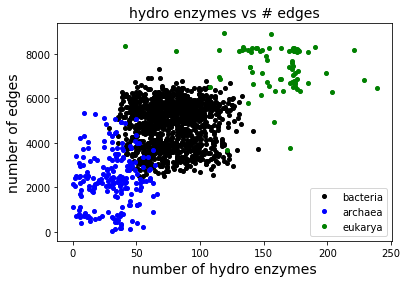

In [99]:
### hydro enzymes vs # edges
plt.plot(hydros_bacteria, bacteria['nbr_edges'], 'ko', markersize=4, label='bacteria')
plt.plot(hydros_archaea, archaea['nbr_edges'], 'bo', markersize=4, label='archaea')
plt.plot(hydros_eukarya, eukarya['nbr_edges'], 'go', markersize=4, label='eukarya')
plt.title('hydro enzymes vs # edges', fontsize=14)
plt.xlabel('number of hydro enzymes', fontsize=14)
plt.ylabel('number of edges', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('hydros_vs_edges')

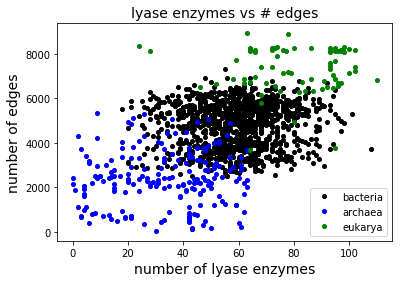

In [100]:
### lyase enzymes vs # edges
plt.plot(lyases_bacteria, bacteria['nbr_edges'], 'ko', markersize=4, label='bacteria')
plt.plot(lyases_archaea, archaea['nbr_edges'], 'bo', markersize=4, label='archaea')
plt.plot(lyases_eukarya, eukarya['nbr_edges'], 'go', markersize=4, label='eukarya')
plt.title('lyase enzymes vs # edges', fontsize=14)
plt.xlabel('number of lyase enzymes', fontsize=14)
plt.ylabel('number of edges', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lyases_vs_edges')

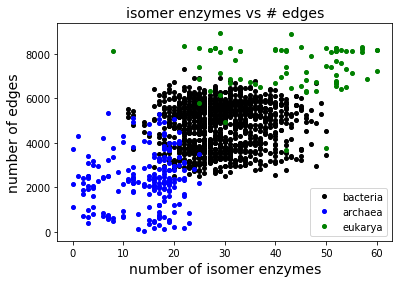

In [101]:
### isomer enzymes vs # edges
plt.plot(isomers_bacteria, bacteria['nbr_edges'], 'ko', markersize=4, label='bacteria')
plt.plot(isomers_archaea, archaea['nbr_edges'], 'bo', markersize=4, label='archaea')
plt.plot(isomers_eukarya, eukarya['nbr_edges'], 'go', markersize=4, label='eukarya')
plt.title('isomer enzymes vs # edges', fontsize=14)
plt.xlabel('number of isomer enzymes', fontsize=14)
plt.ylabel('number of edges', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('isomers_vs_edges')

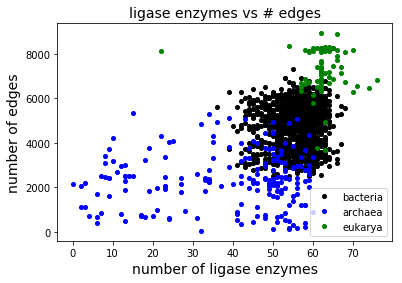

In [102]:
### ligase enzymes vs # edges
plt.plot(ligs_bacteria, bacteria['nbr_edges'], 'ko', markersize=4, label='bacteria')
plt.plot(ligs_archaea, archaea['nbr_edges'], 'bo', markersize=4, label='archaea')
plt.plot(ligs_eukarya, eukarya['nbr_edges'], 'go', markersize=4, label='eukarya')
plt.title('ligase enzymes vs # edges', fontsize=14)
plt.xlabel('number of ligase enzymes', fontsize=14)
plt.ylabel('number of edges', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('ligs_vs_edges')

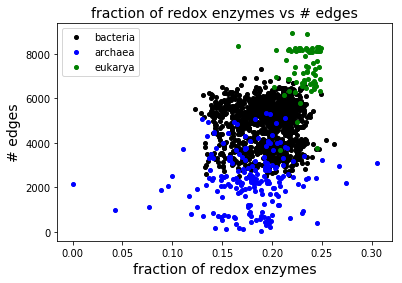

In [103]:
### redox enzyme frac vs degree
plt.plot(oxido_frac_bacteria, bacteria['nbr_edges'], 'ko', markersize=4, label='bacteria')
plt.plot(oxido_frac_archaea, archaea['nbr_edges'], 'bo', markersize=4, label='archaea')
plt.plot(oxido_frac_eukarya, eukarya['nbr_edges'], 'go', markersize=4, label='eukarya')
plt.title('fraction of redox enzymes vs # edges', fontsize=14)
plt.xlabel('fraction of redox enzymes', fontsize=14)
plt.ylabel('# edges', fontsize=14)
plt.legend(loc='upper left')
plt.savefig('oxido_frac_vs_edges')

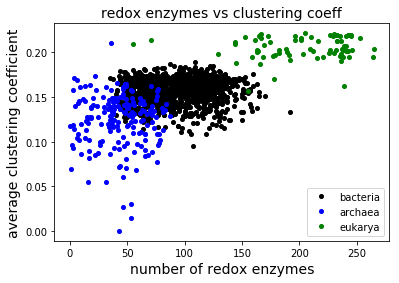

In [104]:
### redox enzymes vs average clustering coefficient
plt.plot(oxidos_bacteria, bacteria['ave_clustering_coeff_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxidos_archaea, archaea['ave_clustering_coeff_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxidos_eukarya, eukarya['ave_clustering_coeff_lcc'], 'go', markersize=4, label='eukarya')
plt.title('redox enzymes vs clustering coeff', fontsize=14)
plt.xlabel('number of redox enzymes', fontsize=14)
plt.ylabel('average clustering coefficient', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('oxidos_vs_clustcoeff')

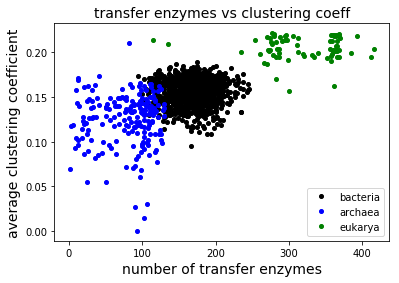

In [105]:
### transfer enzymes vs average clustering coefficient
plt.plot(transfers_bacteria, bacteria['ave_clustering_coeff_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(transfers_archaea, archaea['ave_clustering_coeff_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(transfers_eukarya, eukarya['ave_clustering_coeff_lcc'], 'go', markersize=4, label='eukarya')
plt.title('transfer enzymes vs clustering coeff', fontsize=14)
plt.xlabel('number of transfer enzymes', fontsize=14)
plt.ylabel('average clustering coefficient', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('transfers_vs_clustcoeff')

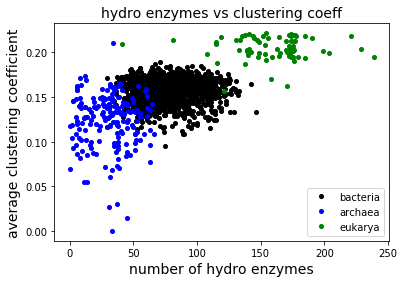

In [106]:
### hydro enzymes vs average clustering coefficient
plt.plot(hydros_bacteria, bacteria['ave_clustering_coeff_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(hydros_archaea, archaea['ave_clustering_coeff_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(hydros_eukarya, eukarya['ave_clustering_coeff_lcc'], 'go', markersize=4, label='eukarya')
plt.title('hydro enzymes vs clustering coeff', fontsize=14)
plt.xlabel('number of hydro enzymes', fontsize=14)
plt.ylabel('average clustering coefficient', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('hydros_vs_clustcoeff')

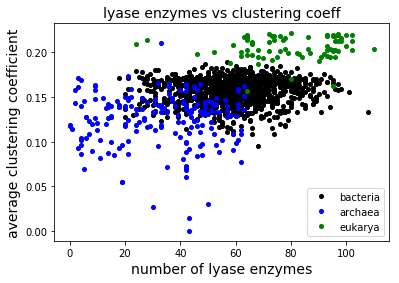

In [107]:
### lyase enzymes vs average clustering coefficient
plt.plot(lyases_bacteria, bacteria['ave_clustering_coeff_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(lyases_archaea, archaea['ave_clustering_coeff_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(lyases_eukarya, eukarya['ave_clustering_coeff_lcc'], 'go', markersize=4, label='eukarya')
plt.title('lyase enzymes vs clustering coeff', fontsize=14)
plt.xlabel('number of lyase enzymes', fontsize=14)
plt.ylabel('average clustering coefficient', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lyases_vs_clustcoeff')

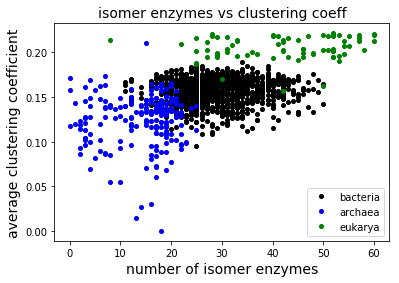

In [108]:
### isomer enzymes vs average clustering coefficient
plt.plot(isomers_bacteria, bacteria['ave_clustering_coeff_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(isomers_archaea, archaea['ave_clustering_coeff_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(isomers_eukarya, eukarya['ave_clustering_coeff_lcc'], 'go', markersize=4, label='eukarya')
plt.title('isomer enzymes vs clustering coeff', fontsize=14)
plt.xlabel('number of isomer enzymes', fontsize=14)
plt.ylabel('average clustering coefficient', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('isomers_vs_clustcoeff')

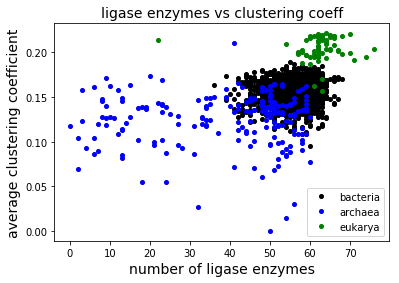

In [109]:
### ligase enzymes vs average clustering coefficient
plt.plot(ligs_bacteria, bacteria['ave_clustering_coeff_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(ligs_archaea, archaea['ave_clustering_coeff_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(ligs_eukarya, eukarya['ave_clustering_coeff_lcc'], 'go', markersize=4, label='eukarya')
plt.title('ligase enzymes vs clustering coeff', fontsize=14)
plt.xlabel('number of ligase enzymes', fontsize=14)
plt.ylabel('average clustering coefficient', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('ligs_vs_clustcoeff')

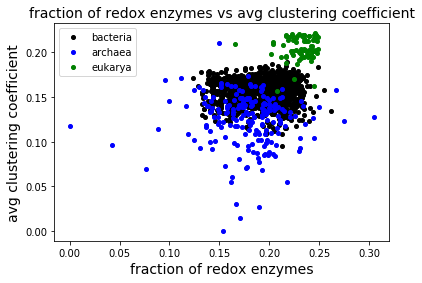

In [110]:
### redox enzyme frac vs degree
plt.plot(oxido_frac_bacteria, bacteria['ave_clustering_coeff_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxido_frac_archaea, archaea['ave_clustering_coeff_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxido_frac_eukarya, eukarya['ave_clustering_coeff_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of redox enzymes vs avg clustering coefficient', fontsize=14)
plt.xlabel('fraction of redox enzymes', fontsize=14)
plt.ylabel('avg clustering coefficient', fontsize=14)
plt.legend(loc='upper left')
plt.savefig('oxido_frac_vs_clustcoeff')

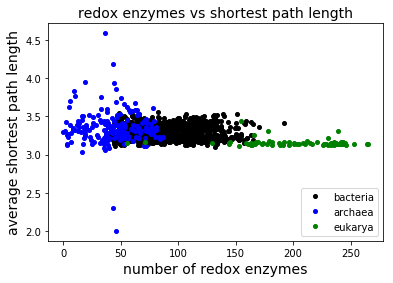

In [111]:
### redox enzymes vs average shortest path length
plt.plot(oxidos_bacteria, bacteria['ave_shortest_path_length_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxidos_archaea, archaea['ave_shortest_path_length_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxidos_eukarya, eukarya['ave_shortest_path_length_lcc'], 'go', markersize=4, label='eukarya')
plt.title('redox enzymes vs shortest path length', fontsize=14)
plt.xlabel('number of redox enzymes', fontsize=14)
plt.ylabel('average shortest path length', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('oxidos_vs_spl')

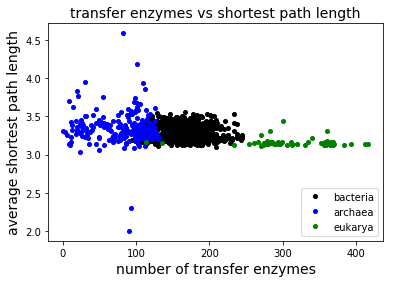

In [112]:
### transfer enzymes vs average shortest path length
plt.plot(transfers_bacteria, bacteria['ave_shortest_path_length_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(transfers_archaea, archaea['ave_shortest_path_length_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(transfers_eukarya, eukarya['ave_shortest_path_length_lcc'], 'go', markersize=4, label='eukarya')
plt.title('transfer enzymes vs shortest path length', fontsize=14)
plt.xlabel('number of transfer enzymes', fontsize=14)
plt.ylabel('average shortest path length', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('transfers_vs_spl')

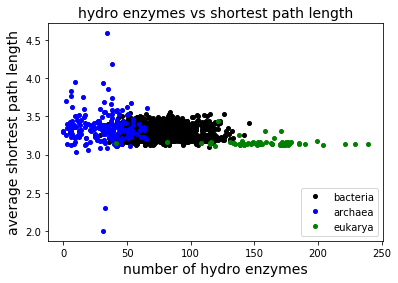

In [113]:
### hydro enzymes vs average shortest path length
plt.plot(hydros_bacteria, bacteria['ave_shortest_path_length_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(hydros_archaea, archaea['ave_shortest_path_length_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(hydros_eukarya, eukarya['ave_shortest_path_length_lcc'], 'go', markersize=4, label='eukarya')
plt.title('hydro enzymes vs shortest path length', fontsize=14)
plt.xlabel('number of hydro enzymes', fontsize=14)
plt.ylabel('average shortest path length', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('hydros_vs_spl')

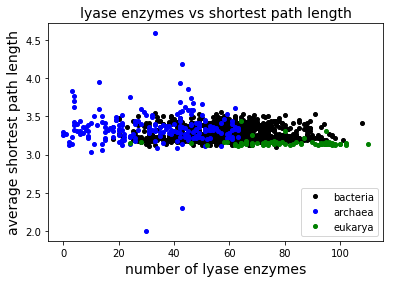

In [114]:
### lyase enzymes vs average shortest path length
plt.plot(lyases_bacteria, bacteria['ave_shortest_path_length_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(lyases_archaea, archaea['ave_shortest_path_length_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(lyases_eukarya, eukarya['ave_shortest_path_length_lcc'], 'go', markersize=4, label='eukarya')
plt.title('lyase enzymes vs shortest path length', fontsize=14)
plt.xlabel('number of lyase enzymes', fontsize=14)
plt.ylabel('average shortest path length', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lyases_vs_spl')

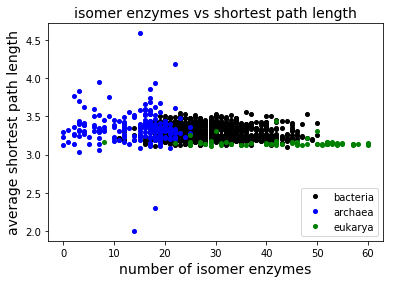

In [115]:
### isomer enzymes vs average shortest path length
plt.plot(isomers_bacteria, bacteria['ave_shortest_path_length_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(isomers_archaea, archaea['ave_shortest_path_length_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(isomers_eukarya, eukarya['ave_shortest_path_length_lcc'], 'go', markersize=4, label='eukarya')
plt.title('isomer enzymes vs shortest path length', fontsize=14)
plt.xlabel('number of isomer enzymes', fontsize=14)
plt.ylabel('average shortest path length', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('isomers_vs_spl')

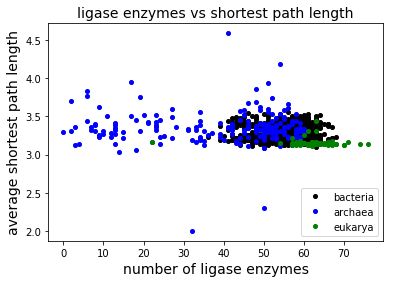

In [116]:
### ligase enzymes vs average shortest path length
plt.plot(ligs_bacteria, bacteria['ave_shortest_path_length_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(ligs_archaea, archaea['ave_shortest_path_length_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(ligs_eukarya, eukarya['ave_shortest_path_length_lcc'], 'go', markersize=4, label='eukarya')
plt.title('ligase enzymes vs shortest path length', fontsize=14)
plt.xlabel('number of ligase enzymes', fontsize=14)
plt.ylabel('average shortest path length', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('ligases_vs_spl')

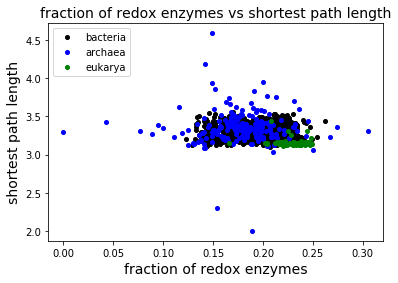

In [117]:
### redox enzyme frac vs degree
plt.plot(oxido_frac_bacteria, bacteria['ave_shortest_path_length_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxido_frac_archaea, archaea['ave_shortest_path_length_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxido_frac_eukarya, eukarya['ave_shortest_path_length_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of redox enzymes vs shortest path length', fontsize=14)
plt.xlabel('fraction of redox enzymes', fontsize=14)
plt.ylabel('shortest path length', fontsize=14)
plt.legend(loc='upper left')
plt.savefig('oxido_frac_vs_spl')

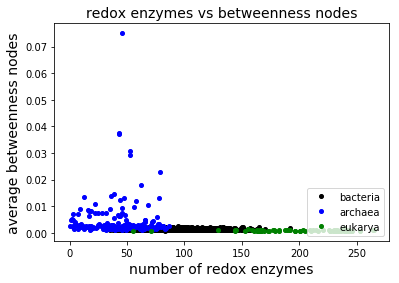

In [118]:
### redox enzymes vs average shortest path length
plt.plot(oxidos_bacteria, bacteria['ave_betweenness_nodes_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxidos_archaea, archaea['ave_betweenness_nodes_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxidos_eukarya, eukarya['ave_betweenness_nodes_lcc'], 'go', markersize=4, label='eukarya')
plt.title('redox enzymes vs betweenness nodes', fontsize=14)
plt.xlabel('number of redox enzymes', fontsize=14)
plt.ylabel('average betweenness nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('oxidos_betweenness_nodes')

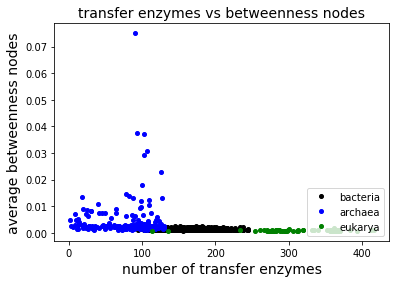

In [119]:
### transfer enzymes vs betweenness nodes
plt.plot(transfers_bacteria, bacteria['ave_betweenness_nodes_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(transfers_archaea, archaea['ave_betweenness_nodes_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(transfers_eukarya, eukarya['ave_betweenness_nodes_lcc'], 'go', markersize=4, label='eukarya')
plt.title('transfer enzymes vs betweenness nodes', fontsize=14)
plt.xlabel('number of transfer enzymes', fontsize=14)
plt.ylabel('average betweenness nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('transfers_betweenness_nodes')

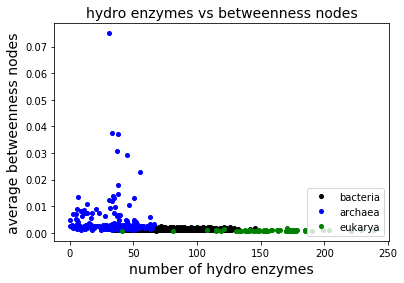

In [120]:
### hydro enzymes vs average shortest path length
plt.plot(hydros_bacteria, bacteria['ave_betweenness_nodes_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(hydros_archaea, archaea['ave_betweenness_nodes_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(hydros_eukarya, eukarya['ave_betweenness_nodes_lcc'], 'go', markersize=4, label='eukarya')
plt.title('hydro enzymes vs betweenness nodes', fontsize=14)
plt.xlabel('number of hydro enzymes', fontsize=14)
plt.ylabel('average betweenness nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('hydros_betweenness_nodes')

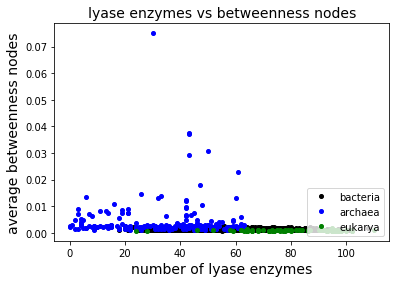

In [121]:
### lyase enzymes vs average shortest path length
plt.plot(lyases_bacteria, bacteria['ave_betweenness_nodes_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(lyases_archaea, archaea['ave_betweenness_nodes_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(lyases_eukarya, eukarya['ave_betweenness_nodes_lcc'], 'go', markersize=4, label='eukarya')
plt.title('lyase enzymes vs betweenness nodes', fontsize=14)
plt.xlabel('number of lyase enzymes', fontsize=14)
plt.ylabel('average betweenness nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lyases_betweenness_nodes')

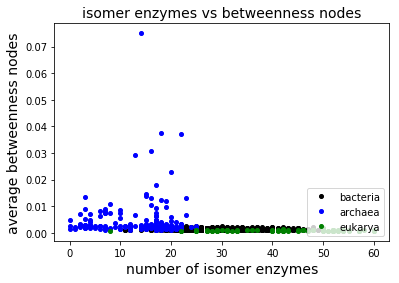

In [122]:
### isomer enzymes vs average shortest path length
plt.plot(isomers_bacteria, bacteria['ave_betweenness_nodes_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(isomers_archaea, archaea['ave_betweenness_nodes_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(isomers_eukarya, eukarya['ave_betweenness_nodes_lcc'], 'go', markersize=4, label='eukarya')
plt.title('isomer enzymes vs betweenness nodes', fontsize=14)
plt.xlabel('number of isomer enzymes', fontsize=14)
plt.ylabel('average betweenness nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('isomers_betweenness_nodes')

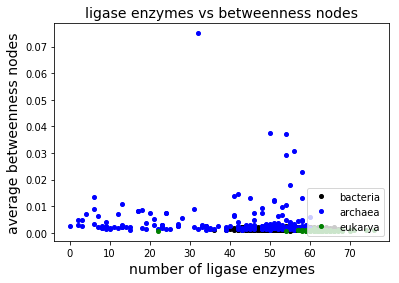

In [123]:
### ligase enzymes vs average shortest path length
plt.plot(ligs_bacteria, bacteria['ave_betweenness_nodes_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(ligs_archaea, archaea['ave_betweenness_nodes_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(ligs_eukarya, eukarya['ave_betweenness_nodes_lcc'], 'go', markersize=4, label='eukarya')
plt.title('ligase enzymes vs betweenness nodes', fontsize=14)
plt.xlabel('number of ligase enzymes', fontsize=14)
plt.ylabel('average betweenness nodes', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('ligs_betweenness_nodes')

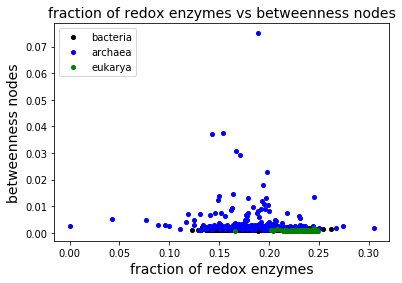

In [124]:
### redox enzyme frac vs degree
plt.plot(oxido_frac_bacteria, bacteria['ave_betweenness_nodes_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxido_frac_archaea, archaea['ave_betweenness_nodes_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxido_frac_eukarya, eukarya['ave_betweenness_nodes_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of redox enzymes vs betweenness nodes', fontsize=14)
plt.xlabel('fraction of redox enzymes', fontsize=14)
plt.ylabel('betweenness nodes', fontsize=14)
plt.legend(loc='upper left')
plt.savefig('oxido_frac_betweenness_nodes')

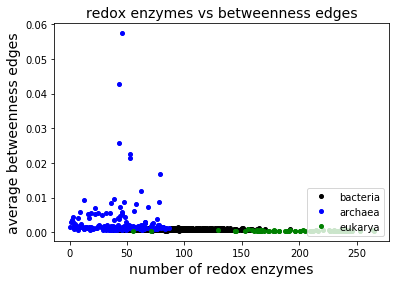

In [125]:
### redox enzymes vs average betweenness edges
plt.plot(oxidos_bacteria, bacteria['ave_betweenness_edges_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxidos_archaea, archaea['ave_betweenness_edges_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxidos_eukarya, eukarya['ave_betweenness_edges_lcc'], 'go', markersize=4, label='eukarya')
plt.title('redox enzymes vs betweenness edges', fontsize=14)
plt.xlabel('number of redox enzymes', fontsize=14)
plt.ylabel('average betweenness edges', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('oxido_betweenness_edges')

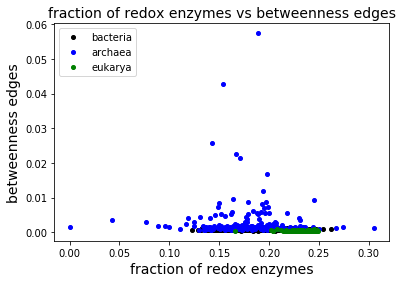

In [126]:
### redox enzyme frac vs avg betweenness edges
plt.plot(oxido_frac_bacteria, bacteria['ave_betweenness_edges_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxido_frac_archaea, archaea['ave_betweenness_edges_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxido_frac_eukarya, eukarya['ave_betweenness_edges_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of redox enzymes vs betweenness edges', fontsize=14)
plt.xlabel('fraction of redox enzymes', fontsize=14)
plt.ylabel('betweenness edges', fontsize=14)
plt.legend(loc='upper left')
plt.savefig('oxido_frac_betweenness_edges')

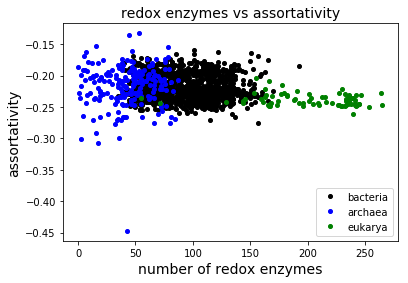

In [127]:
### redox enzymes vs assortativity
plt.plot(oxidos_bacteria, bacteria['assortativity_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxidos_archaea, archaea['assortativity_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxidos_eukarya, eukarya['assortativity_lcc'], 'go', markersize=4, label='eukarya')
plt.title('redox enzymes vs assortativity', fontsize=14)
plt.xlabel('number of redox enzymes', fontsize=14)
plt.ylabel('assortativity', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('oxidos_assortativity')

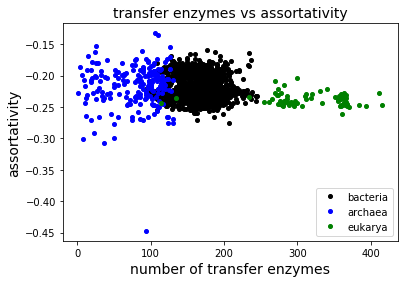

In [128]:
### transfer enzymes vs assortativity
plt.plot(transfers_bacteria, bacteria['assortativity_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(transfers_archaea, archaea['assortativity_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(transfers_eukarya, eukarya['assortativity_lcc'], 'go', markersize=4, label='eukarya')
plt.title('transfer enzymes vs assortativity', fontsize=14)
plt.xlabel('number of transfer enzymes', fontsize=14)
plt.ylabel('assortativity', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('transfers_assortativity')

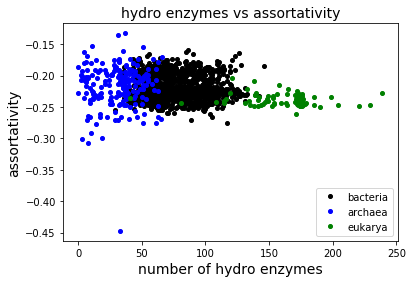

In [129]:
### hydro enzymes vs assortativity
plt.plot(hydros_bacteria, bacteria['assortativity_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(hydros_archaea, archaea['assortativity_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(hydros_eukarya, eukarya['assortativity_lcc'], 'go', markersize=4, label='eukarya')
plt.title('hydro enzymes vs assortativity', fontsize=14)
plt.xlabel('number of hydro enzymes', fontsize=14)
plt.ylabel('assortativity', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('hydros_assortativity')

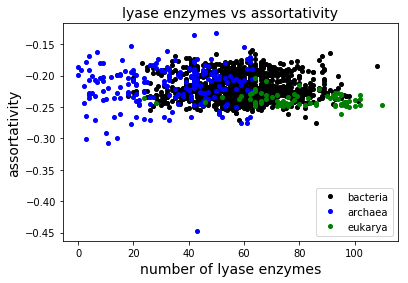

In [130]:
### lyase enzymes vs assortativity
plt.plot(lyases_bacteria, bacteria['assortativity_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(lyases_archaea, archaea['assortativity_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(lyases_eukarya, eukarya['assortativity_lcc'], 'go', markersize=4, label='eukarya')
plt.title('lyase enzymes vs assortativity', fontsize=14)
plt.xlabel('number of lyase enzymes', fontsize=14)
plt.ylabel('assortativity', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('lyases_assortativity')

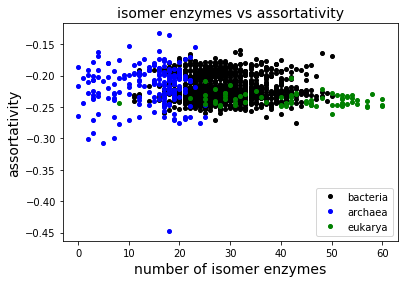

In [131]:
### isomer enzymes vs assortativity
plt.plot(isomers_bacteria, bacteria['assortativity_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(isomers_archaea, archaea['assortativity_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(isomers_eukarya, eukarya['assortativity_lcc'], 'go', markersize=4, label='eukarya')
plt.title('isomer enzymes vs assortativity', fontsize=14)
plt.xlabel('number of isomer enzymes', fontsize=14)
plt.ylabel('assortativity', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('isomers_assortativity')

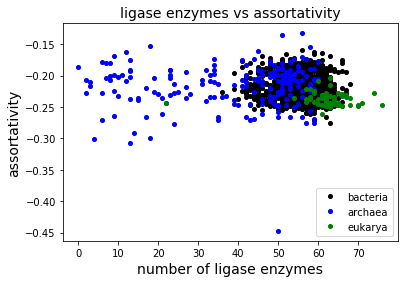

In [132]:
### ligase enzymes vs assortativity
plt.plot(ligs_bacteria, bacteria['assortativity_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(ligs_archaea, archaea['assortativity_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(ligs_eukarya, eukarya['assortativity_lcc'], 'go', markersize=4, label='eukarya')
plt.title('ligase enzymes vs assortativity', fontsize=14)
plt.xlabel('number of ligase enzymes', fontsize=14)
plt.ylabel('assortativity', fontsize=14)
plt.legend(loc='lower right')
plt.savefig('ligs_assortativity')

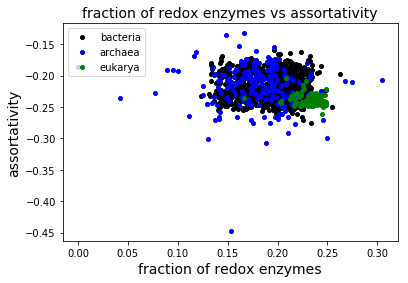

In [133]:
### redox enzyme frac vs assortativity
plt.plot(oxido_frac_bacteria, bacteria['assortativity_lcc'], 'ko', markersize=4, label='bacteria')
plt.plot(oxido_frac_archaea, archaea['assortativity_lcc'], 'bo', markersize=4, label='archaea')
plt.plot(oxido_frac_eukarya, eukarya['assortativity_lcc'], 'go', markersize=4, label='eukarya')
plt.title('fraction of redox enzymes vs assortativity', fontsize=14)
plt.xlabel('fraction of redox enzymes', fontsize=14)
plt.ylabel('assortativity', fontsize=14)
plt.legend(loc='upper left')
plt.savefig('oxido_frac_assortativity')

In [1]:
G = nx.read_gpickle('sub_sub_net_individual_eukarya-1.gpickle')

NameError: name 'nx' is not defined

In [ ]:
G.nodes

In [ ]:
G.edges